# Diretórios e Bibliotecas

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install numpy pandas seaborn matplotlib scikit-learn --quiet

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Conjunto de Dados

## Importação dos Dados

In [4]:
bootcamp_train_df = pd.read_csv('/content/drive/MyDrive/Bootcamp CDIA/model/data/bootcamp_train.csv')

In [5]:
bootcamp_train_df.head()

,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,falha_1,falha_2,falha_3,falha_4,falha_5,falha_6,falha_outros
0,0,154,169.0,260124,260136,100,75,27,17,9948.0,...,0.0362,0.3068,125,False,0,False,False,não,False,Sim
1,1,1121,-186.0,1789332,1789337,100,-206,9,-194,2240.0,...,0.0294,0.1441,115,False,False,False,True,Não,False,Não
2,2,41,216.0,2708878,2708939,100,6298,275,134,654634.0,...,-0.1879,1.0000,42,False,False,True,False,não,False,Não
3,3,129,157.0,86408,86427,100,276,39,26,33858.0,...,-0.0416,0.8223,115,False,False,True,False,não,False,Não
4,4,436,442.0,4959398,530985,100,63,17,17,6374.0,...,-0.2096,0.2083,90,False,True,False,False,Não,False,Não


## Análise Exploratória

In [6]:
bootcamp_train_df.shape

(3390, 39)

### 1. Qual o tipo de dados de cada feature?

In [7]:
bootcamp_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3390 non-null   int64  
 1   x_minimo                      3390 non-null   int64  
 2   x_maximo                      3334 non-null   float64
 3   y_minimo                      3390 non-null   int64  
 4   y_maximo                      3390 non-null   int64  
 5   peso_da_placa                 3390 non-null   int64  
 6   area_pixels                   3390 non-null   int64  
 7   perimetro_x                   3390 non-null   int64  
 8   perimetro_y                   3390 non-null   int64  
 9   soma_da_luminosidade          3290 non-null   float64
 10  maximo_da_luminosidade        3292 non-null   float64
 11  comprimento_do_transportador  3390 non-null   int64  
 12  tipo_do_aço_A300              3390 non-null   object 
 13  tip

#### Valores de cada coluna do tipo object

In [8]:
bootcamp_train_df['tipo_do_aço_A300'].unique()

array(['Não', 'não', '1', 'Sim', 'sim', '0', 'N', '-'], dtype=object)

In [9]:
bootcamp_train_df['tipo_do_aço_A400'].unique()

array(['sim', 'Sim', 'Não', 'não', nan, '1', '0', 'S', 'nao'],
      dtype=object)

In [10]:
bootcamp_train_df['falha_1'].unique()

array(['False', '0', '1', 'True', 'nao', 'S'], dtype=object)

In [11]:
bootcamp_train_df['falha_2'].unique()

array(['0', 'False', 'True', 'y', '1', 'S'], dtype=object)

In [12]:
bootcamp_train_df['falha_3'].unique()

array([False,  True])

In [13]:
bootcamp_train_df['falha_4'].unique()

array(['False', 'True', 'nao', '0', 'S', '1'], dtype=object)

In [14]:
bootcamp_train_df['falha_5'].unique()

array(['não', 'Não', 'Sim', 'sim'], dtype=object)

In [15]:
bootcamp_train_df['falha_6'].unique()

array([False,  True])

In [16]:
bootcamp_train_df['falha_outros'].unique()

array(['Sim', 'Não'], dtype=object)

### 2. Existem dados nulos? Se sim, quantos são?

#### Quantidade de dados nulos por feature

In [17]:
null_data_quantity = bootcamp_train_df.isnull().sum()
null_data_quantity[null_data_quantity > 0]

,0
x_maximo,56
soma_da_luminosidade,100
maximo_da_luminosidade,98
tipo_do_aço_A400,76
espessura_da_chapa_de_aço,41
index_quadrado,36
indice_global_externo,59
indice_de_luminosidade,50


In [18]:
null_data_quantity.sum()

np.int64(516)

#### Dados nulos

In [19]:
null_data_indexes = bootcamp_train_df.isnull().any(axis=1)
null_data_indexes = null_data_indexes[null_data_indexes == True]
null_data_indexes = null_data_indexes.index
null_data_indexes

Index([  19,   25,   32,   33,   34,   39,   43,   48,   51,   55,
       ...
       3323, 3334, 3341, 3345, 3346, 3353, 3357, 3371, 3384, 3388],
      dtype='int64', length=481)

In [20]:
bootcamp_train_df.iloc[null_data_indexes].drop('id', axis=1)

,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,maximo_da_luminosidade,...,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,falha_1,falha_2,falha_3,falha_4,falha_5,falha_6,falha_outros
19,828,-186.0,21571832,2451296,100,67,13,-194,8107.0,134.0,...,NaN,0.2051,112,False,False,False,False,não,True,Não
25,-11,308.0,1323717,1323745,100,222,25,-194,25660.0,125.0,...,-0.0970,0.6453,104,False,True,False,False,Não,False,Não
32,2874,422.0,289647,289665,100,355,-229,58,46882.0,143.0,...,0.0317,0.9899,123,False,False,False,False,Não,False,Sim
33,39,212.0,862475,862693,100,-206,794,495,NaN,142.0,...,-0.0843,1.0000,975,False,False,True,False,não,False,Não
34,-11,357.0,1747625,1747660,100,314,84,50,38597.0,140.0,...,-0.0397,0.9979,110,False,True,False,False,não,False,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353,9224,927.0,439180,439212,100,64,11,17,7164.0,NaN,...,-0.1228,0.2083,97,True,False,False,False,Não,False,Não
3357,37,222.0,1112116,1112135,100,-206,755,452,NaN,141.0,...,-0.0810,1.0000,25,False,False,True,False,Não,False,Não
3371,1312,1316.0,2601604,2601606,100,-206,7,6,6682.0,132.0,...,-0.0970,0.1400,100,True,False,False,False,não,False,Não
3384,1051,1066.0,3420976,3420988,100,146,25,25,14605.0,126.0,...,-0.0985,0.4009,104,False,False,False,False,Não,False,Sim


### 3. Existem registros duplicados?

In [21]:
bootcamp_train_df.duplicated().sum()

np.int64(0)

### 4. Os dados possuem uma dispersão muito grande?

In [22]:
numeric_data = bootcamp_train_df.select_dtypes(include=['int64', 'float64']).drop('id', axis=1)

In [23]:
numeric_data[['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo', 'peso_da_placa']].describe()

,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa
count,3390.000000,3334.00000,3.390000e+03,3.390000e+03,3390.0
mean,995.507375,605.90012,2.692640e+06,1.592301e+06,100.0
std,1796.737709,548.07724,5.625693e+06,1.821345e+06,0.0
min,-11.000000,-186.00000,-2.000000e+01,-1.660000e+02,100.0
25%,41.000000,179.00000,3.934352e+05,3.407380e+05,100.0
50%,614.000000,544.00000,1.265462e+06,1.128297e+06,100.0
75%,1187.500000,1090.00000,2.555025e+06,2.184335e+06,100.0
max,15266.000000,1713.00000,1.041366e+08,1.291709e+07,100.0


In [24]:
numeric_data[['area_pixels', 'perimetro_x', 'perimetro_y']].describe()

,area_pixels,perimetro_x,perimetro_y
count,3390.000000,3390.000000,3390.000000
mean,1566.317699,66.733923,47.261062
std,4337.683975,195.092105,336.794632
min,-206.000000,-229.000000,-194.000000
25%,68.000000,12.000000,11.000000
50%,142.000000,22.000000,21.000000
75%,524.750000,58.000000,56.000000
max,152655.000000,1275.000000,18152.000000


In [25]:
numeric_data[['soma_da_luminosidade', 'minimo_da_luminosidade', 'maximo_da_luminosidade', 'indice_de_luminosidade']].describe()

,soma_da_luminosidade,minimo_da_luminosidade,maximo_da_luminosidade,indice_de_luminosidade
count,3.290000e+03,3390.000000,3292.000000,3340.000000
mean,1.931079e+05,171.763422,129.187424,-0.134957
std,4.549965e+05,272.952080,16.110521,0.133175
min,2.550000e+02,0.000000,37.000000,-0.860300
25%,9.514500e+03,71.000000,124.000000,-0.193725
50%,1.783600e+04,93.000000,127.000000,-0.140800
75%,6.797800e+04,111.000000,135.000000,-0.079000
max,1.159141e+07,2086.000000,253.000000,0.591700


In [26]:
numeric_data[['comprimento_do_transportador', 'espessura_da_chapa_de_aço', 'temperatura']].describe()

,comprimento_do_transportador,espessura_da_chapa_de_aço,temperatura
count,3390.000000,3349.000000,3390.000000
mean,1293.171681,53.130487,79.924760
std,521.109121,85.295729,10.000343
min,-214.000000,-154.000000,45.801848
25%,1356.000000,40.000000,73.137252
50%,1362.000000,60.000000,79.785356
75%,1634.000000,80.000000,86.593446
max,1794.000000,300.000000,121.478951


In [27]:
numeric_data[['index_de_bordas', 'index_vazio', 'index_quadrado', 'index_externo_x',
              'indice_de_bordas_x', 'indice_de_bordas_y', 'indice_de_variacao_x',
              'indice_de_variacao_y', 'indice_global_externo']].describe()

,index_de_bordas,index_vazio,index_quadrado,index_externo_x,indice_de_bordas_x,indice_de_bordas_y,indice_de_variacao_x,indice_de_variacao_y,indice_global_externo
count,3390.000000,3390.000000,3354.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3331.000000
mean,0.340712,0.409954,0.572069,0.032006,0.610754,0.828285,0.083130,0.192553,0.589012
std,0.307037,0.133362,0.263772,0.053980,0.230931,0.225691,0.381303,0.473771,0.480665
min,0.000000,0.000000,0.008300,0.001500,0.014400,0.048400,-0.905854,-1.218085,0.000000
25%,0.060400,0.313350,0.367200,0.006600,0.434975,0.642900,-0.165640,-0.136793,0.000000
50%,0.232400,0.409750,0.545400,0.009500,0.636400,0.964300,0.047686,0.115746,1.000000
75%,0.621650,0.495975,0.818200,0.021275,0.789500,1.000000,0.263110,0.445916,1.000000
max,0.995200,0.943900,1.000000,0.875900,1.000000,1.000000,2.155819,1.941325,1.000000


In [28]:
numeric_data[['log_das_areas', 'log_indice_x', 'log_indice_y', 'indice_de_orientaçao', 'sigmoide_das_areas', ]].describe()

,log_das_areas,log_indice_x,log_indice_y,indice_de_orientaçao,sigmoide_das_areas
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,2.476344,1.317755,1.395298,0.099153,0.570363
std,0.772512,0.479221,0.429142,0.492312,0.335394
min,0.301000,0.301000,0.000000,-0.991000,0.119000
25%,1.929400,1.000000,1.079200,-0.285700,0.248200
50%,2.225300,1.146100,1.322200,0.111100,0.472100
75%,2.829625,1.477100,1.724300,0.526300,0.999300
max,5.183700,3.074100,4.258700,0.991700,1.000000


### 5. Qual a correlação entre as features (excluindo os targets)?

#### Coeficiente de Correlação de Pearson

In [29]:
pearson_correlation_coeficient = numeric_data.corr(method='pearson').fillna(0)

<Axes: >

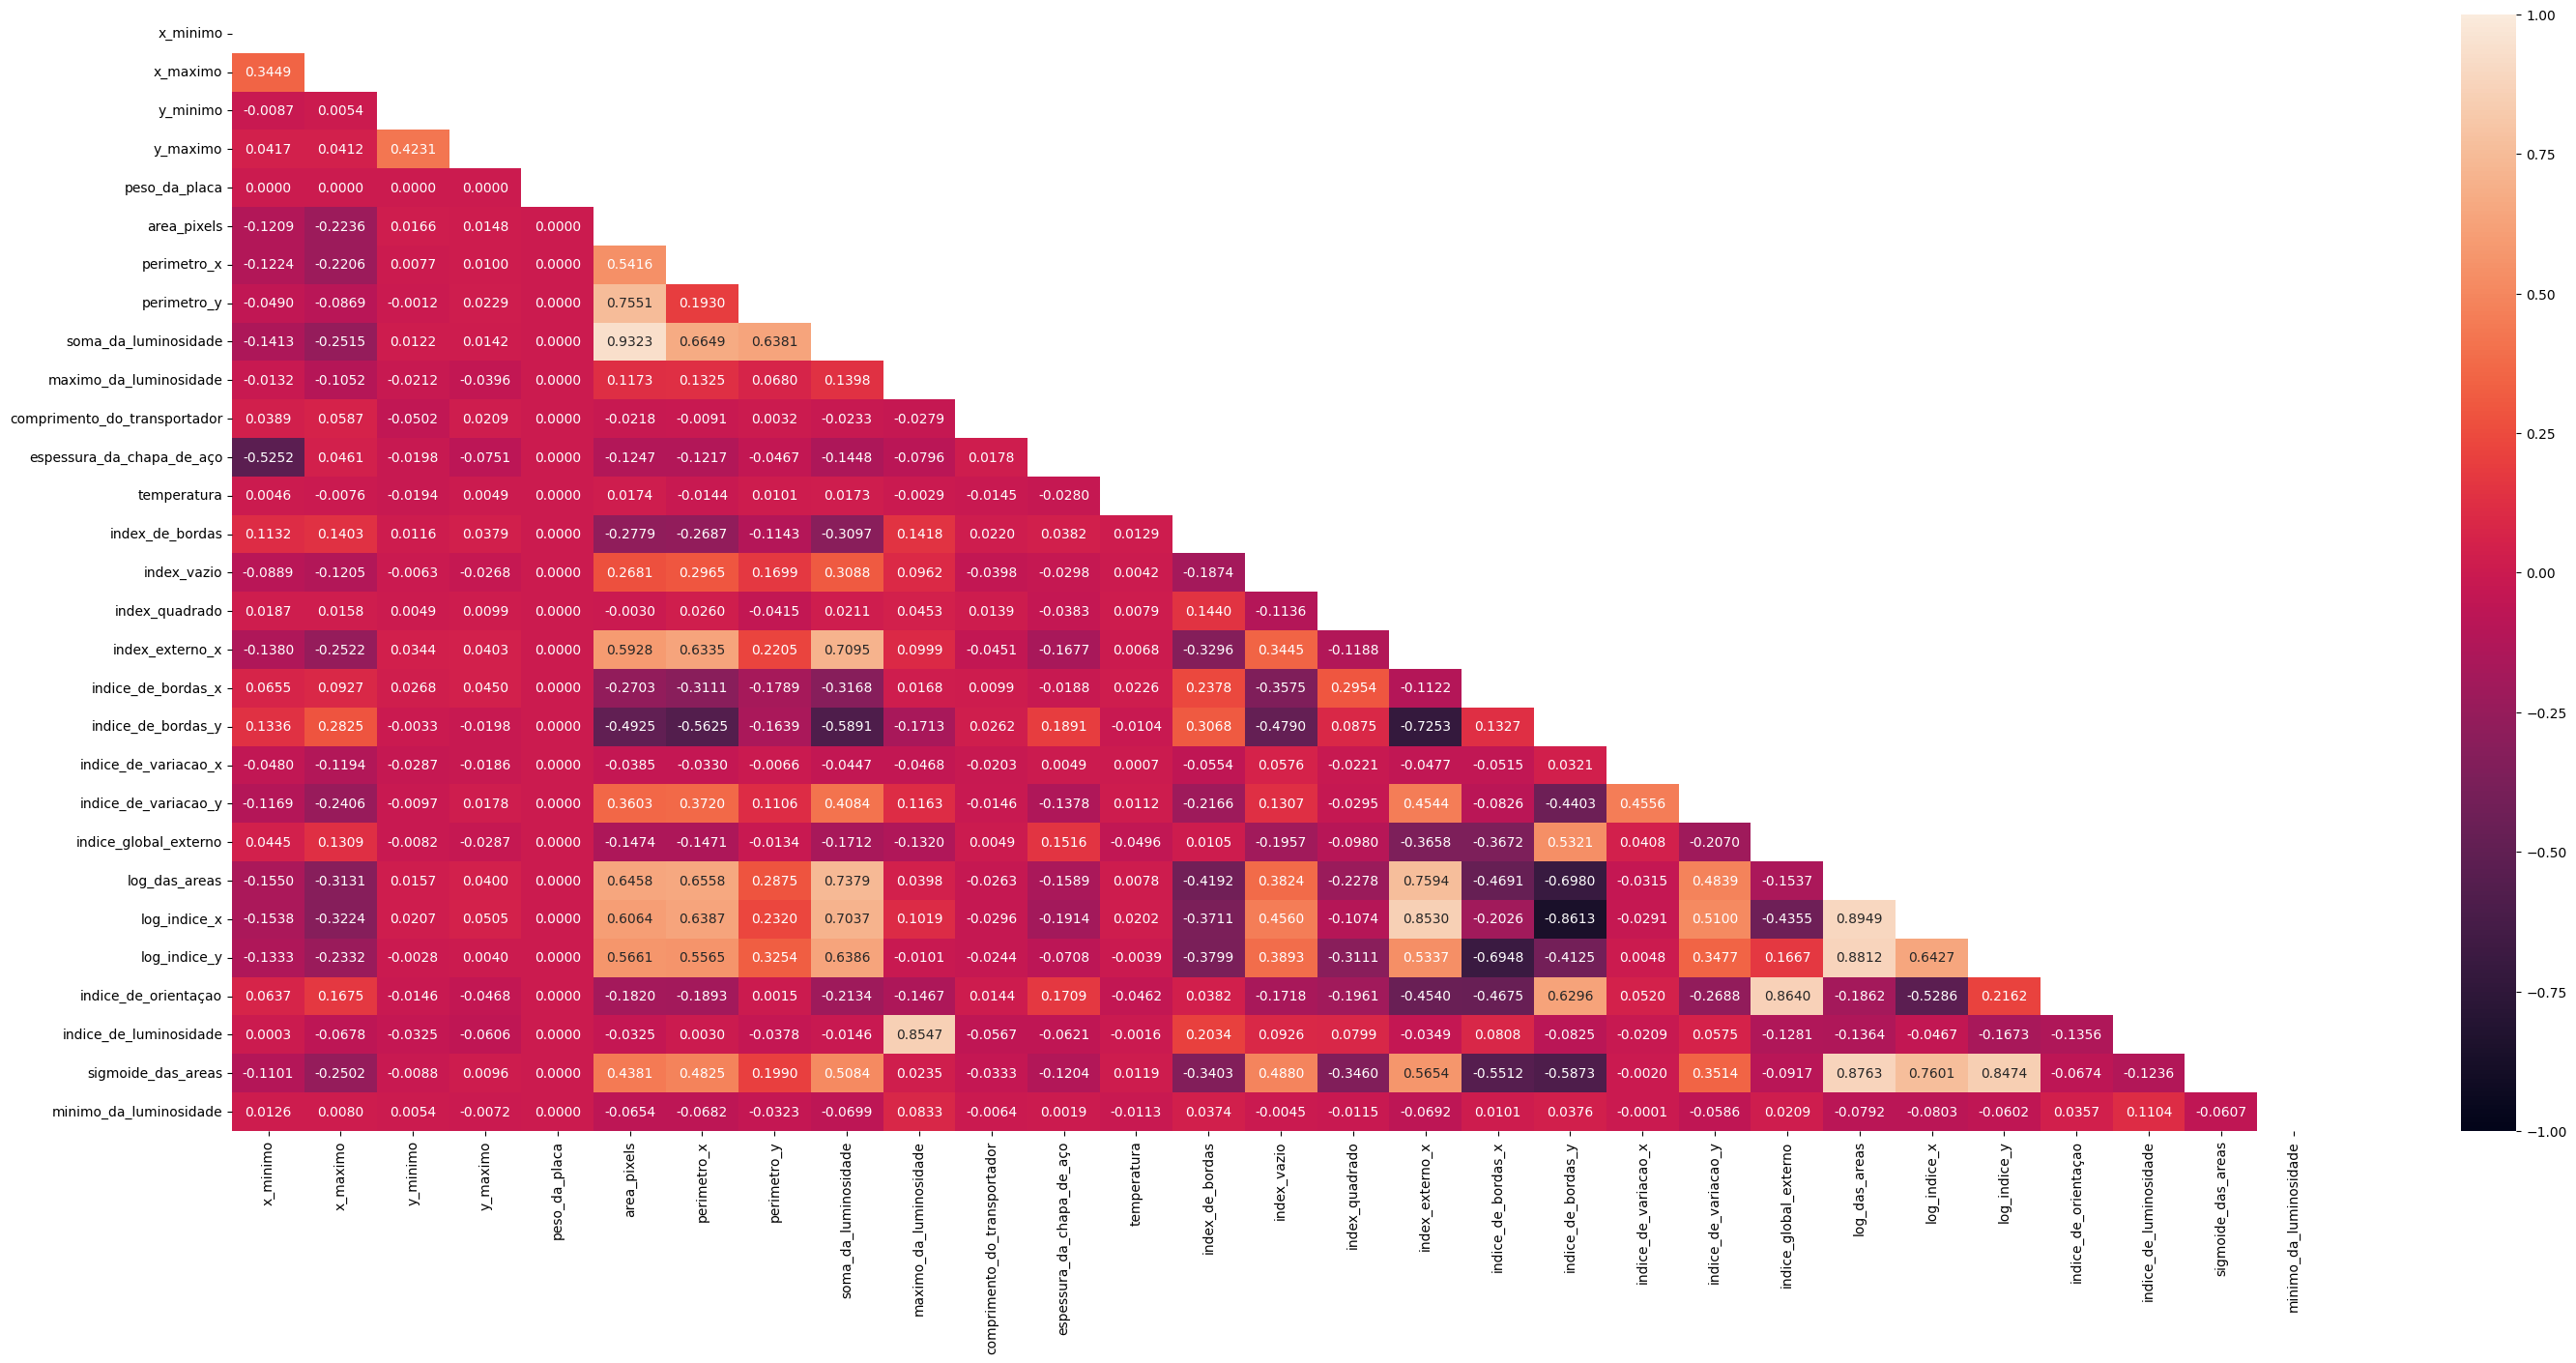

In [30]:
plt.figure(figsize=(35, 15))
mask = np.triu(np.ones_like(pearson_correlation_coeficient, dtype=bool))
sns.heatmap(pearson_correlation_coeficient, annot=True, fmt="0.4f", mask=mask, vmin=-1, vmax=1)

### 6. Os dados possuem outliers? Se sim, possuem alguma relação entre eles?

#### Identificação de outliers

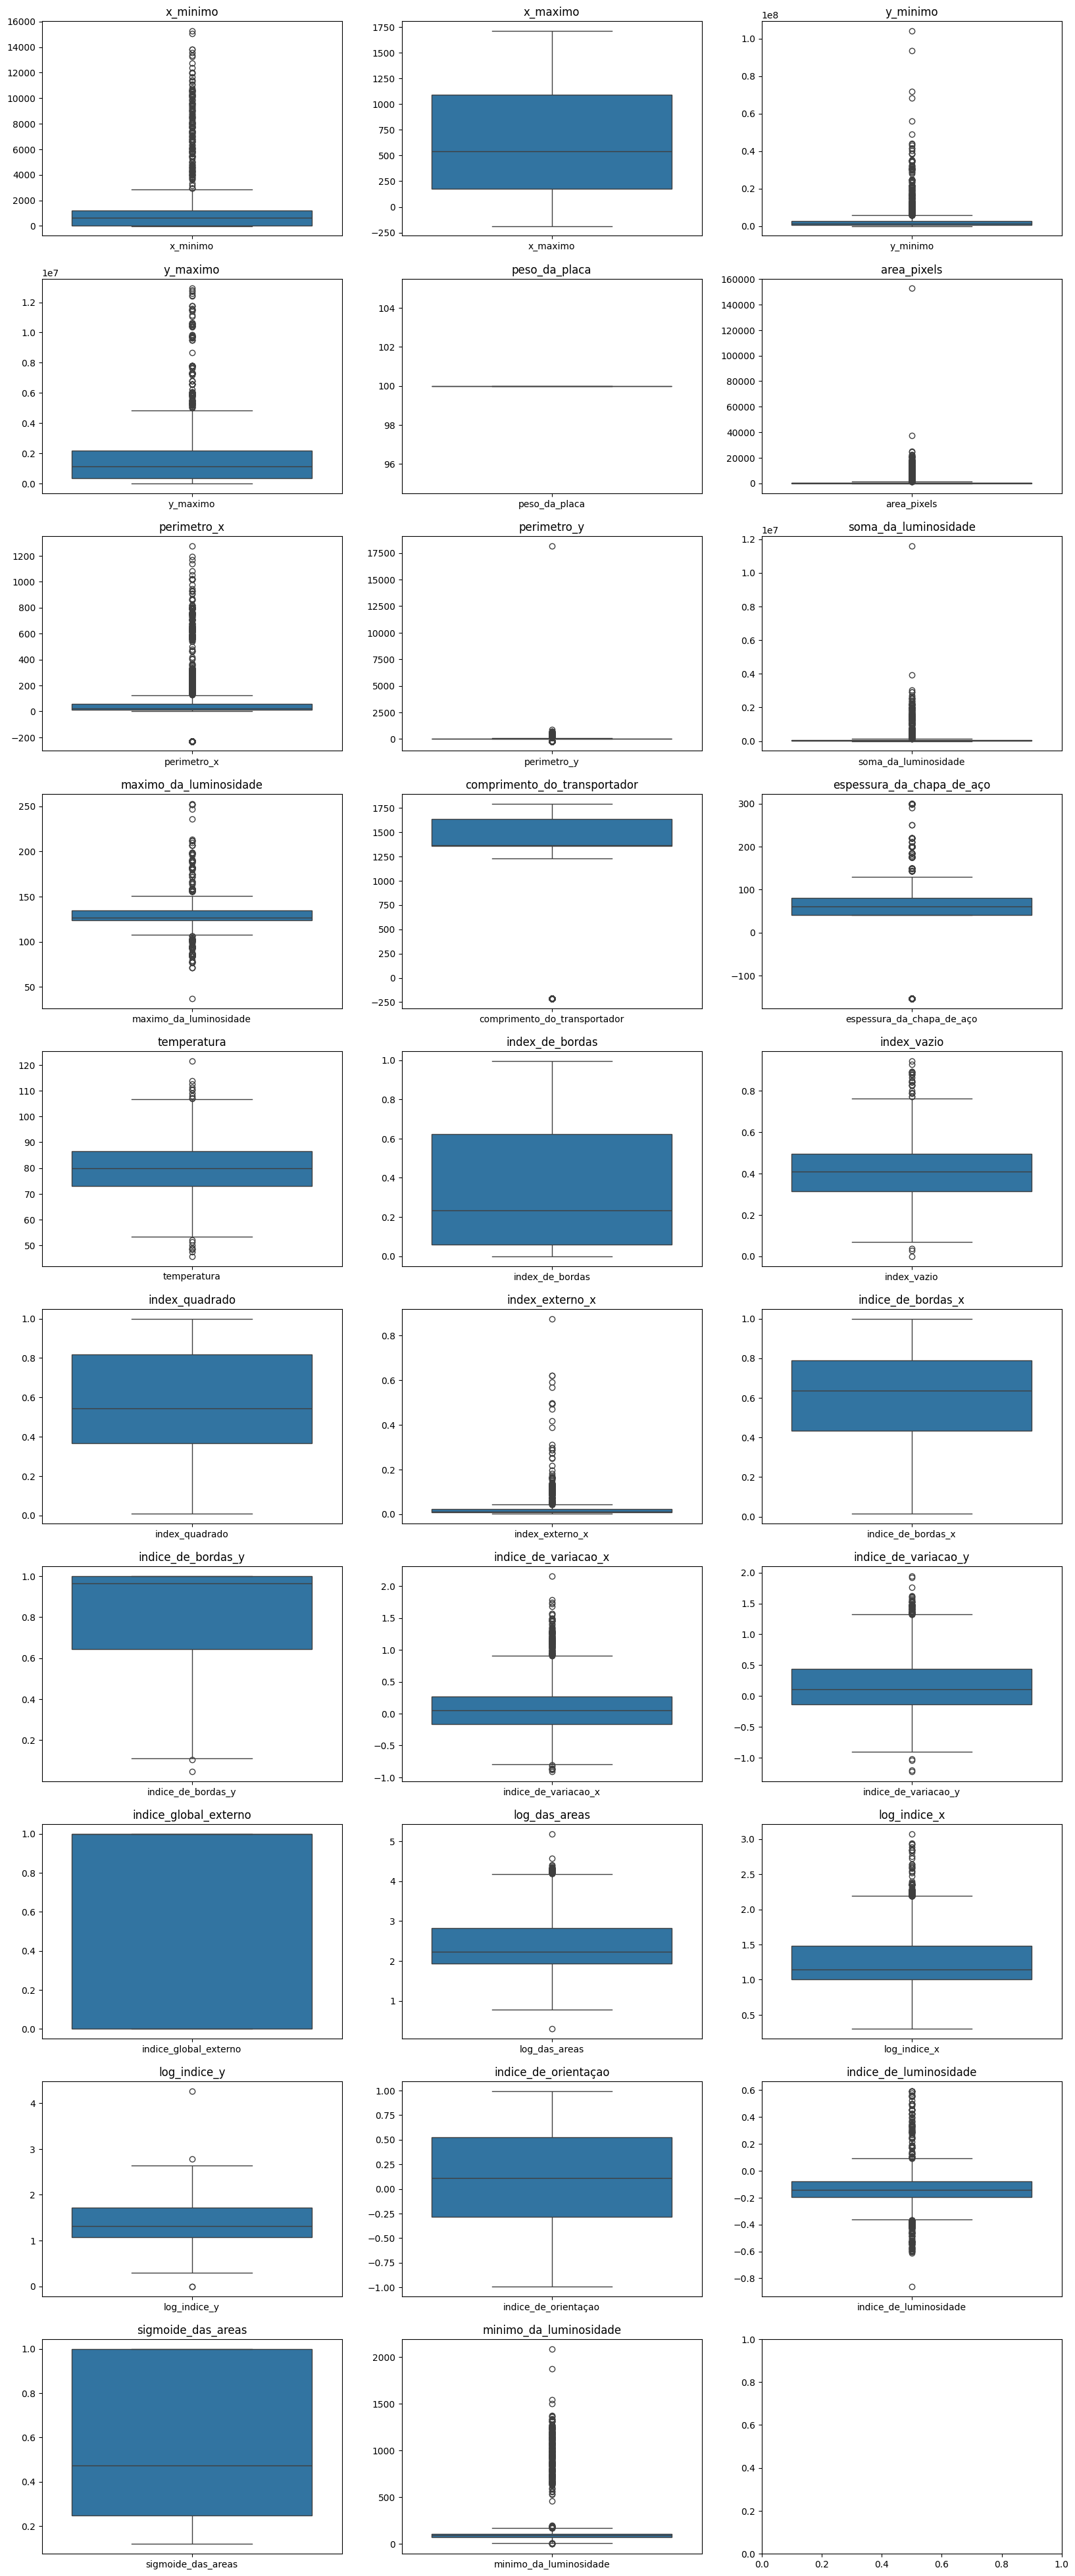

In [31]:
figure, axis = plt.subplots(10, 3)
figure.set_size_inches(20, 50)
x_index = 0
y_index = 0
for column in numeric_data:
  column_axis = axis[y_index, x_index]
  column_axis.set_title(f'{column}')
  sns.boxplot(numeric_data[[column]], ax=column_axis)
  x_index = x_index + 1
  if x_index == 3:
    x_index = 0
    y_index = y_index + 1

In [32]:
outliers_correlation = bootcamp_train_df[['x_minimo', 'y_minimo', 'area_pixels', 'perimetro_x', 'perimetro_y', 'soma_da_luminosidade',
  'maximo_da_luminosidade', 'comprimento_do_transportador', 'espessura_da_chapa_de_aço',
  'index_externo_x', 'log_das_areas', 'log_indice_y', 'indice_de_luminosidade',
  'minimo_da_luminosidade']].corr(method='pearson')

#### Correlação entre as colunas que possuem outliers

<Axes: >

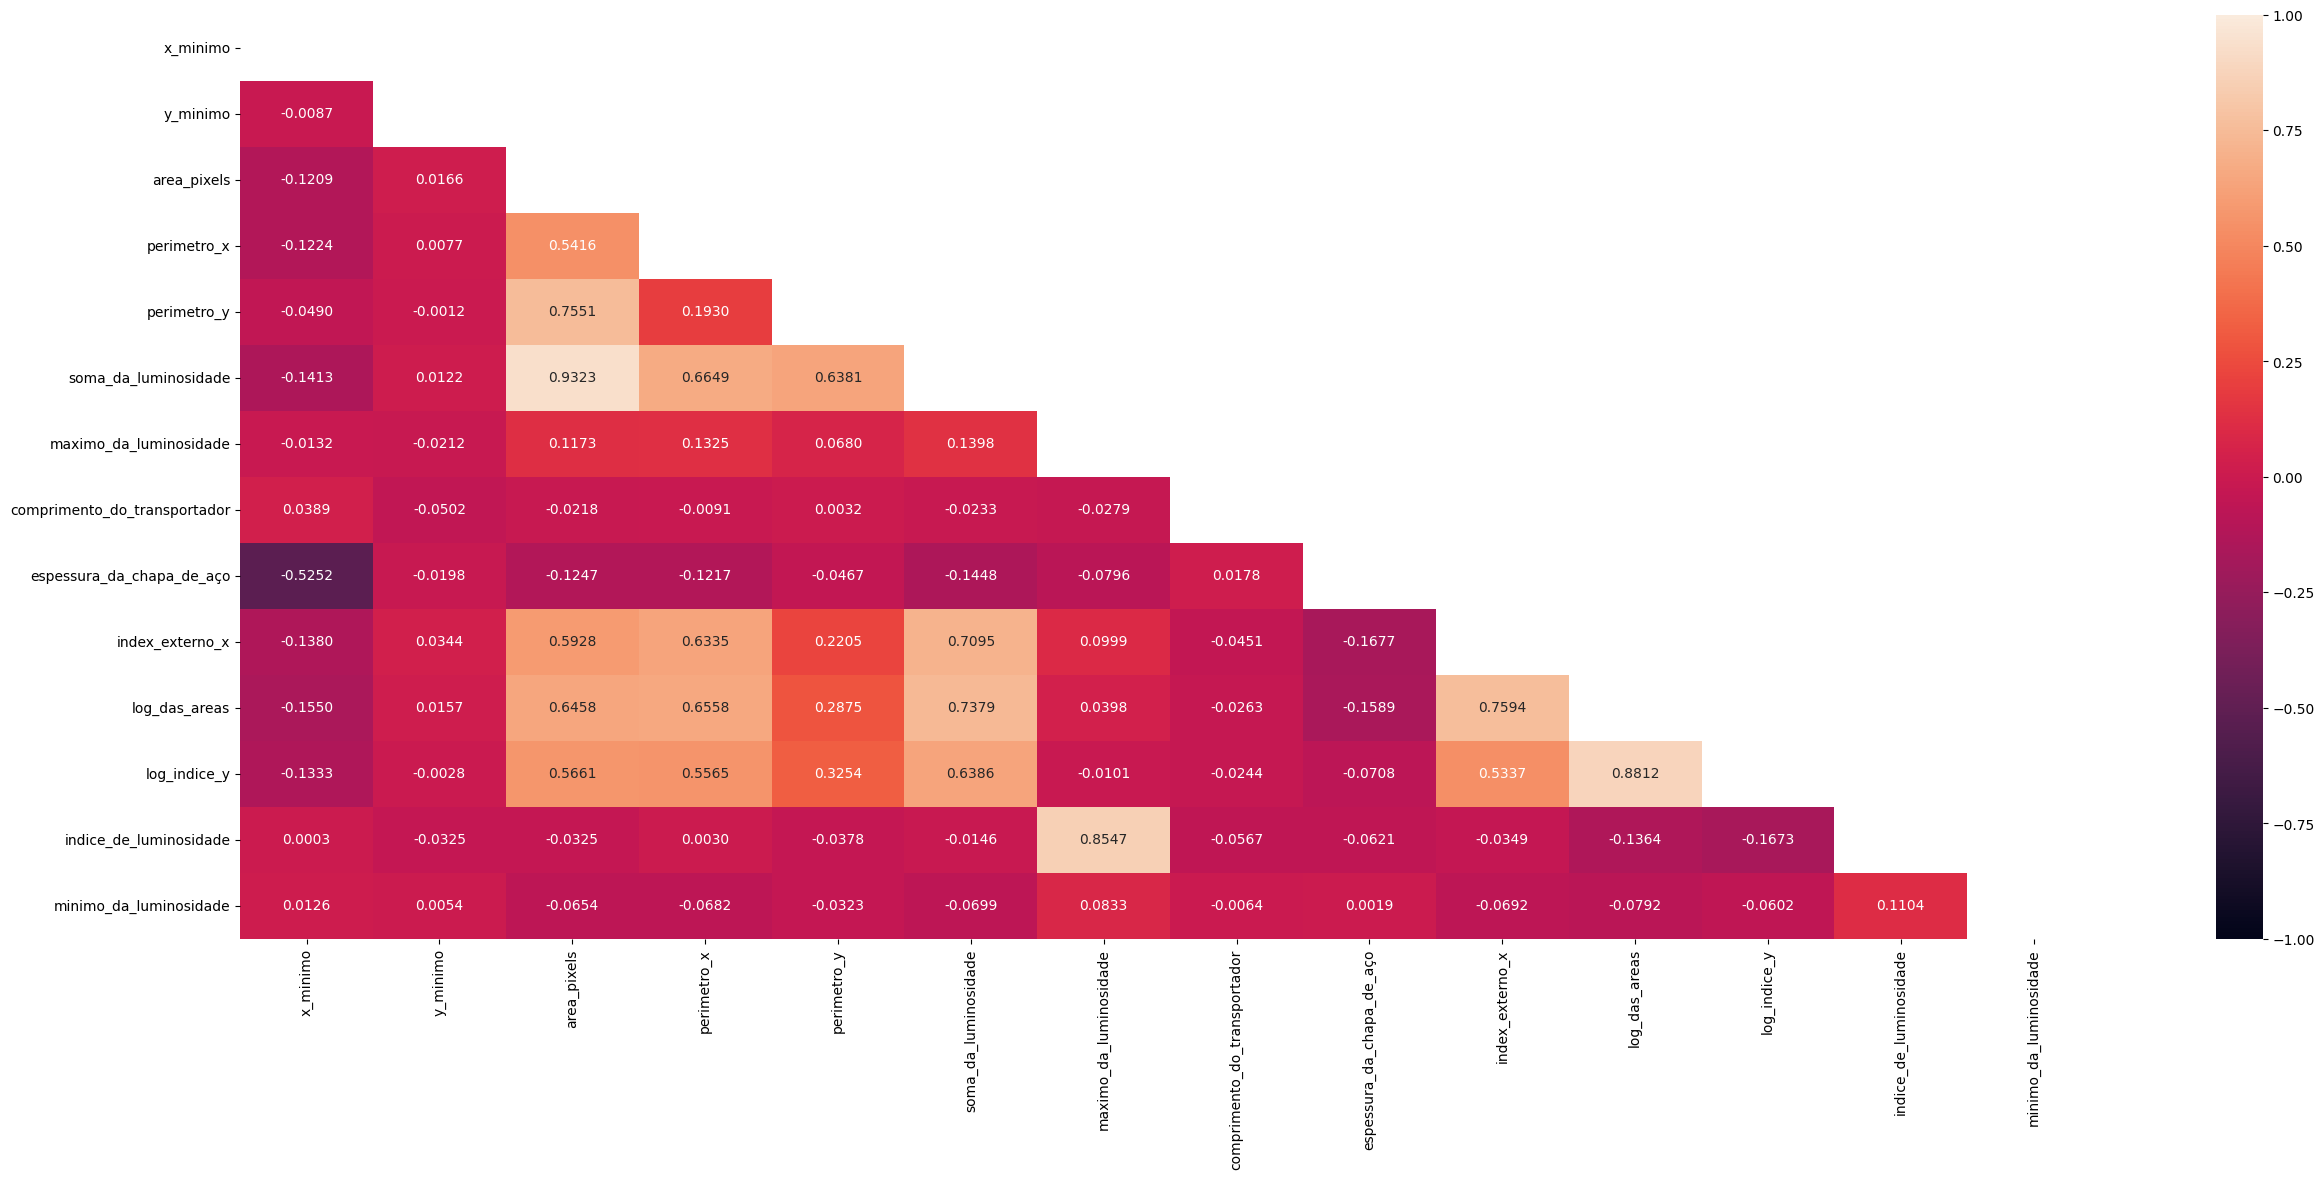

In [33]:
plt.figure(figsize=(30, 12))
mask = np.triu(np.ones_like(outliers_correlation, dtype=bool))
sns.heatmap(outliers_correlation, annot=True, fmt="0.4f", mask=mask, vmin=-1, vmax=1)

# Tratamento de Dados - Criação da coluna target

## 1. Remoção das colunas peso_da_placa e id

In [34]:
bootcamp_train_df.drop(['id', 'peso_da_placa'], axis=1, inplace=True)

In [35]:
bootcamp_train_df.shape

(3390, 37)

## 2. Tratamento dos Dados Nulos

In [36]:
bootcamp_train_df.shape

(3390, 37)

## 3. Colunas Categóricas

### Conversão para valores binários

In [37]:
def encode_column(value):
  true_values = ['Sim', 'sim', 1, 'S', True]
  if value in true_values:
    return 1
  elif pd.isnull(value) == True:
    return np.nan
  else:
    return 0

In [38]:
tipo_aco_300_encoded_column = bootcamp_train_df['tipo_do_aço_A300'].apply(encode_column)
bootcamp_train_df['tipo_do_aço_A300'] = tipo_aco_300_encoded_column

In [39]:
tipo_aco_400_encoded_column = bootcamp_train_df['tipo_do_aço_A400'].apply(encode_column)
bootcamp_train_df['tipo_do_aço_A400'] = tipo_aco_400_encoded_column

In [40]:
falha_1_encoded_column = bootcamp_train_df['falha_1'].apply(encode_column)
bootcamp_train_df['falha_1'] = falha_1_encoded_column

In [41]:
falha_2_encoded_column = bootcamp_train_df['falha_2'].apply(encode_column)
bootcamp_train_df['falha_2'] = falha_2_encoded_column

In [42]:
falha_3_encoded_column = bootcamp_train_df['falha_3'].apply(encode_column)
bootcamp_train_df['falha_3'] = falha_3_encoded_column

In [43]:
falha_4_encoded_column = bootcamp_train_df['falha_4'].apply(encode_column)
bootcamp_train_df['falha_4'] = falha_4_encoded_column

In [44]:
falha_5_encoded_column = bootcamp_train_df['falha_5'].apply(encode_column)
bootcamp_train_df['falha_5'] = falha_5_encoded_column

In [45]:
falha_6_encoded_column = bootcamp_train_df['falha_6'].apply(encode_column)
bootcamp_train_df['falha_6'] = falha_6_encoded_column

In [46]:
falha_outros_encoded_column = bootcamp_train_df['falha_outros'].apply(encode_column)
bootcamp_train_df['falha_outros'] = falha_outros_encoded_column

### Criação de coluna target única

In [47]:
target_columns = bootcamp_train_df[['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']]

In [48]:
targets = target_columns['falha_1'].replace(0, np.nan)
targets = targets.combine_first(target_columns['falha_2'].replace(1, 2))
targets = targets.replace(0, np.nan)
targets = targets.combine_first(target_columns['falha_3'].replace(1, 3))
targets = targets.replace(0, np.nan)
targets = targets.combine_first(target_columns['falha_4'].replace(1, 4))
targets = targets.replace(0, np.nan)
targets = targets.combine_first(target_columns['falha_5'].replace(1, 5))
targets = targets.replace(0, np.nan)
targets = targets.combine_first(target_columns['falha_6'].replace(1, 6))
targets = targets.replace(0, np.nan)
targets = targets.combine_first(target_columns['falha_outros'].replace(1, 7))
targets = targets.replace(0, -1)

In [49]:
bootcamp_train_df['targets'] = targets
bootcamp_train_df.drop(['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros'], axis=1, inplace=True)

# Encontrar Padrão de Targets

In [50]:
# sns.pairplot(bootcamp_train_df, hue='targets', palette='Paired')

## Relação entre indice_de_variacao

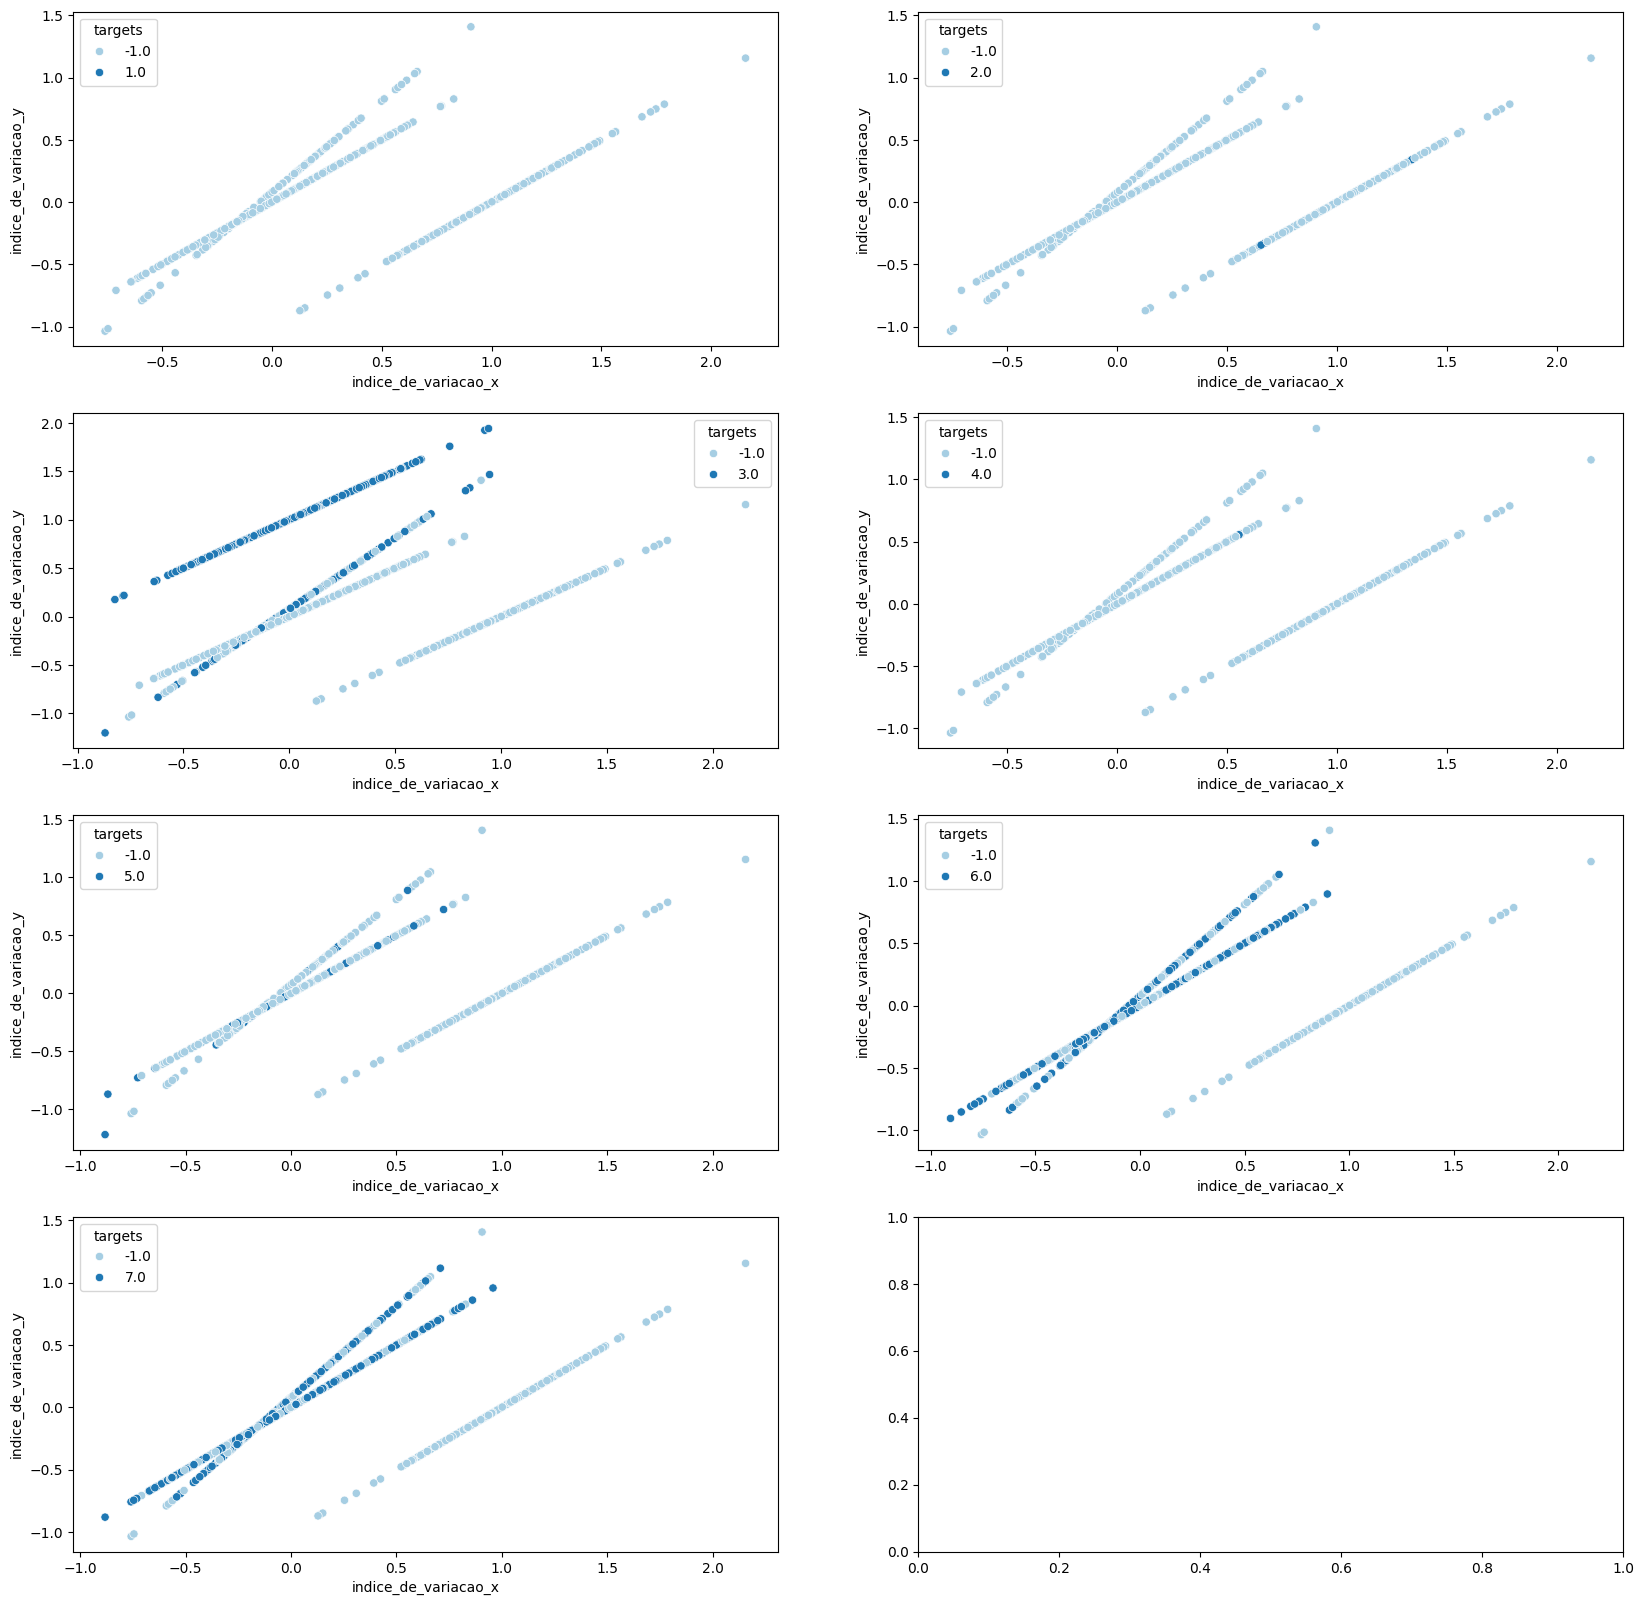

In [51]:
figure, axis = plt.subplots(4, 2)
figure.set_size_inches(20, 20)
labels = list(bootcamp_train_df['targets'].unique())
labels.remove(-1)
labels.sort()
labels
x_index = 0
y_index = 0
for label in labels:
  plot_data = bootcamp_train_df.query(f"targets == -1 or targets == {label}")
  column_axis = axis[y_index, x_index]
  sns.scatterplot(data=plot_data, x='indice_de_variacao_x', y='indice_de_variacao_y', hue="targets", palette="Paired", ax=column_axis)
  x_index = x_index + 1
  if x_index == 2:
    x_index = 0
    y_index = y_index + 1

<Axes: xlabel='indice_de_variacao_x', ylabel='indice_de_variacao_y'>

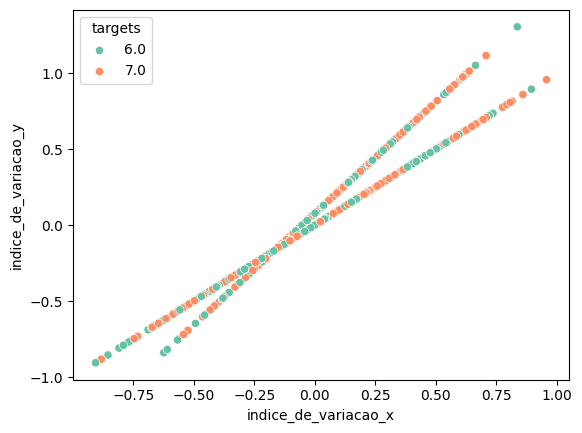

In [52]:
sns.scatterplot(data=bootcamp_train_df.query("targets == 6 or targets == 7"), x='indice_de_variacao_x', y='indice_de_variacao_y', hue="targets", palette="Set2")

## Análise de Padrões

In [53]:
def plot_feature_kde_subplots(feature, labels):
  figure, axis = plt.subplots(2, 2)
  figure.set_size_inches(15, 10)
  x_index = 0
  y_index = 0
  for label in labels:
    plot_data = bootcamp_train_df.query(f"targets == -1 or targets == {label}")
    column_axis = axis[y_index, x_index]
    column_axis.set_title(f'Target analisado: {label}')
    sns.kdeplot(data=plot_data, x=feature, hue='targets', fill=True, palette='Set2', ax=column_axis)
    x_index = x_index + 1
    if x_index == 2:
      x_index = 0
      y_index = y_index + 1

### Comparativo de Dados dos Registros sem Target com os Targets 3, 6 e 7

In [54]:
labels = [3, 6, 7]
for column in bootcamp_train_df.columns[:-1]:
  plot_feature_kde_subplots(column, labels)

Output hidden; open in https://colab.research.google.com to view.

# Tratamento de Dados - Criar Novo Valor de Target

In [55]:
bootcamp_train_df['targets'] = bootcamp_train_df['targets'].replace(-1, 8)
bootcamp_train_df['targets'].value_counts()

,count
targets,
7.0,1184
6.0,806
3.0,649
8.0,643
5.0,96
1.0,5
2.0,5
4.0,2


# Tratamento de Dados - Remover Dados dos Targets que Possuem Registros Insuficientes

In [56]:
failure_1_data_index = bootcamp_train_df[bootcamp_train_df['targets'] == 1].index
failure_2_data_index = bootcamp_train_df[bootcamp_train_df['targets'] == 2].index
failure_4_data_index = bootcamp_train_df[bootcamp_train_df['targets'] == 4].index

In [57]:
bootcamp_train_df.drop(failure_1_data_index, axis=0, inplace=True)
bootcamp_train_df.drop(failure_2_data_index, axis=0, inplace=True)
bootcamp_train_df.drop(failure_4_data_index, axis=0, inplace=True)
bootcamp_train_df.shape

(3378, 31)

# Tratamento de Dados - Dados Nulos

In [58]:
def calculate_null_values_quantity():
  null_data_quantity_by_column = bootcamp_train_df.isna().sum()
  null_data_quantity_by_column = null_data_quantity_by_column[null_data_quantity_by_column > 0]
  return null_data_quantity_by_column

## Features Contínuas

In [59]:
def replace_nan_by_median(column):
  median = bootcamp_train_df[column].median()
  bootcamp_train_df[column] = bootcamp_train_df[column].replace(np.nan, median)

In [60]:
calculate_null_values_quantity()

,0
x_maximo,56
soma_da_luminosidade,98
maximo_da_luminosidade,98
tipo_do_aço_A400,76
espessura_da_chapa_de_aço,41
index_quadrado,36
indice_global_externo,59
indice_de_luminosidade,50


In [61]:
replace_nan_by_median('x_maximo')
calculate_null_values_quantity()

,0
soma_da_luminosidade,98
maximo_da_luminosidade,98
tipo_do_aço_A400,76
espessura_da_chapa_de_aço,41
index_quadrado,36
indice_global_externo,59
indice_de_luminosidade,50


In [62]:
replace_nan_by_median('soma_da_luminosidade')
calculate_null_values_quantity()

,0
maximo_da_luminosidade,98
tipo_do_aço_A400,76
espessura_da_chapa_de_aço,41
index_quadrado,36
indice_global_externo,59
indice_de_luminosidade,50


In [63]:
replace_nan_by_median('maximo_da_luminosidade')
calculate_null_values_quantity()

,0
tipo_do_aço_A400,76
espessura_da_chapa_de_aço,41
index_quadrado,36
indice_global_externo,59
indice_de_luminosidade,50


In [64]:
replace_nan_by_median('espessura_da_chapa_de_aço')
calculate_null_values_quantity()

,0
tipo_do_aço_A400,76
index_quadrado,36
indice_global_externo,59
indice_de_luminosidade,50


In [65]:
replace_nan_by_median('index_quadrado')
calculate_null_values_quantity()

,0
tipo_do_aço_A400,76
indice_global_externo,59
indice_de_luminosidade,50


In [66]:
replace_nan_by_median('indice_global_externo')
calculate_null_values_quantity()

,0
tipo_do_aço_A400,76
indice_de_luminosidade,50


In [67]:
replace_nan_by_median('indice_de_luminosidade')
calculate_null_values_quantity()

,0
tipo_do_aço_A400,76


## Features Categóricas

In [68]:
tipo_aco = bootcamp_train_df[['tipo_do_aço_A300', 'tipo_do_aço_A400']]
tipo_aco.head()

,tipo_do_aço_A300,tipo_do_aço_A400
0,0,1.0
1,0,1.0
2,0,1.0
3,0,1.0
4,0,0.0


In [69]:
tipo_do_aco_400_new_values = []
for row_index in range(tipo_aco.shape[0]):
  if np.isnan(tipo_aco['tipo_do_aço_A400'].iloc[row_index]):
    if tipo_aco['tipo_do_aço_A300'].iloc[row_index] == 0:
      tipo_do_aco_400_new_values.append(1)
    else:
      tipo_do_aco_400_new_values.append(0)
  else:
    tipo_do_aco_400_new_values.append(tipo_aco['tipo_do_aço_A400'].iloc[row_index])
len(tipo_do_aco_400_new_values)

3378

In [70]:
bootcamp_train_df['tipo_do_aço_A400'] = tipo_do_aco_400_new_values

In [71]:
calculate_null_values_quantity()

,0


# Tratamento de Dados - Dados Negativos

In [72]:
bootcamp_train_df[bootcamp_train_df[[
    'x_minimo', 'x_maximo', 'y_minimo', 'y_maximo', 'area_pixels',
    'perimetro_x', 'perimetro_y', 'soma_da_luminosidade',
    'maximo_da_luminosidade', 'comprimento_do_transportador',
    'espessura_da_chapa_de_aço', 'index_de_bordas', 'index_vazio',
    'index_quadrado', 'index_externo_x', 'indice_de_bordas_x',
    'indice_de_bordas_y', 'log_das_areas', 'log_indice_x', 'log_indice_y',
    'sigmoide_das_areas', 'minimo_da_luminosidade'
]] < 0]

,x_minimo,x_maximo,y_minimo,y_maximo,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,maximo_da_luminosidade,comprimento_do_transportador,...,indice_de_variacao_y,indice_global_externo,log_das_areas,log_indice_x,log_indice_y,indice_de_orientaçao,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,targets
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-186.0,NaN,NaN,-206.0,NaN,-194.0,NaN,NaN,-214.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3387,NaN,NaN,NaN,NaN,NaN,NaN,-194.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3388,NaN,-186.0,NaN,NaN,-206.0,NaN,NaN,NaN,NaN,-214.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
def replace_negatives_by_median(column):
  median = bootcamp_train_df[column].median()
  new_values = []
  for row_index in range(bootcamp_train_df.shape[0]):
    row_value = bootcamp_train_df[column].iloc[row_index]
    if row_value < 0:
      new_values.append(median)
    else:
      new_values.append(row_value)
  bootcamp_train_df[column] = new_values

In [74]:
columns_to_replace_negative_values = [
    'x_minimo', 'x_maximo', 'y_minimo', 'y_maximo', 'area_pixels',
    'perimetro_x', 'perimetro_y', 'soma_da_luminosidade',
    'maximo_da_luminosidade', 'comprimento_do_transportador',
    'espessura_da_chapa_de_aço', 'index_de_bordas', 'index_vazio',
    'index_quadrado', 'index_externo_x', 'indice_de_bordas_x',
    'indice_de_bordas_y', 'log_das_areas', 'log_indice_x', 'log_indice_y',
    'sigmoide_das_areas', 'minimo_da_luminosidade'
]

In [75]:
for column in columns_to_replace_negative_values:
  replace_negatives_by_median(column)

In [76]:
bootcamp_train_df[[
    'x_minimo', 'x_maximo', 'y_minimo', 'y_maximo', 'area_pixels',
    'perimetro_x', 'perimetro_y', 'soma_da_luminosidade',
    'maximo_da_luminosidade', 'comprimento_do_transportador',
    'espessura_da_chapa_de_aço', 'index_de_bordas', 'index_vazio',
    'index_quadrado', 'index_externo_x', 'indice_de_bordas_x',
    'indice_de_bordas_y', 'log_das_areas', 'log_indice_x', 'log_indice_y',
    'sigmoide_das_areas', 'minimo_da_luminosidade'
]].min()

,0
x_minimo,0.0000
x_maximo,4.0000
y_minimo,6712.0000
y_maximo,6724.0000
area_pixels,2.0000
perimetro_x,2.0000
perimetro_y,2.0000
soma_da_luminosidade,255.0000
maximo_da_luminosidade,37.0000
comprimento_do_transportador,1227.0000


In [77]:
def plot_all_boxplots(data):
  figure, axis = plt.subplots(10, 3)
  figure.set_size_inches(20, 50)
  x_index = 0
  y_index = 0
  for column in data.columns[:-1]:
    column_axis = axis[y_index, x_index]
    column_axis.set_title(f'{column}')
    sns.boxplot(data[[column]], ax=column_axis)
    x_index = x_index + 1
    if x_index == 3:
      x_index = 0
      y_index = y_index + 1

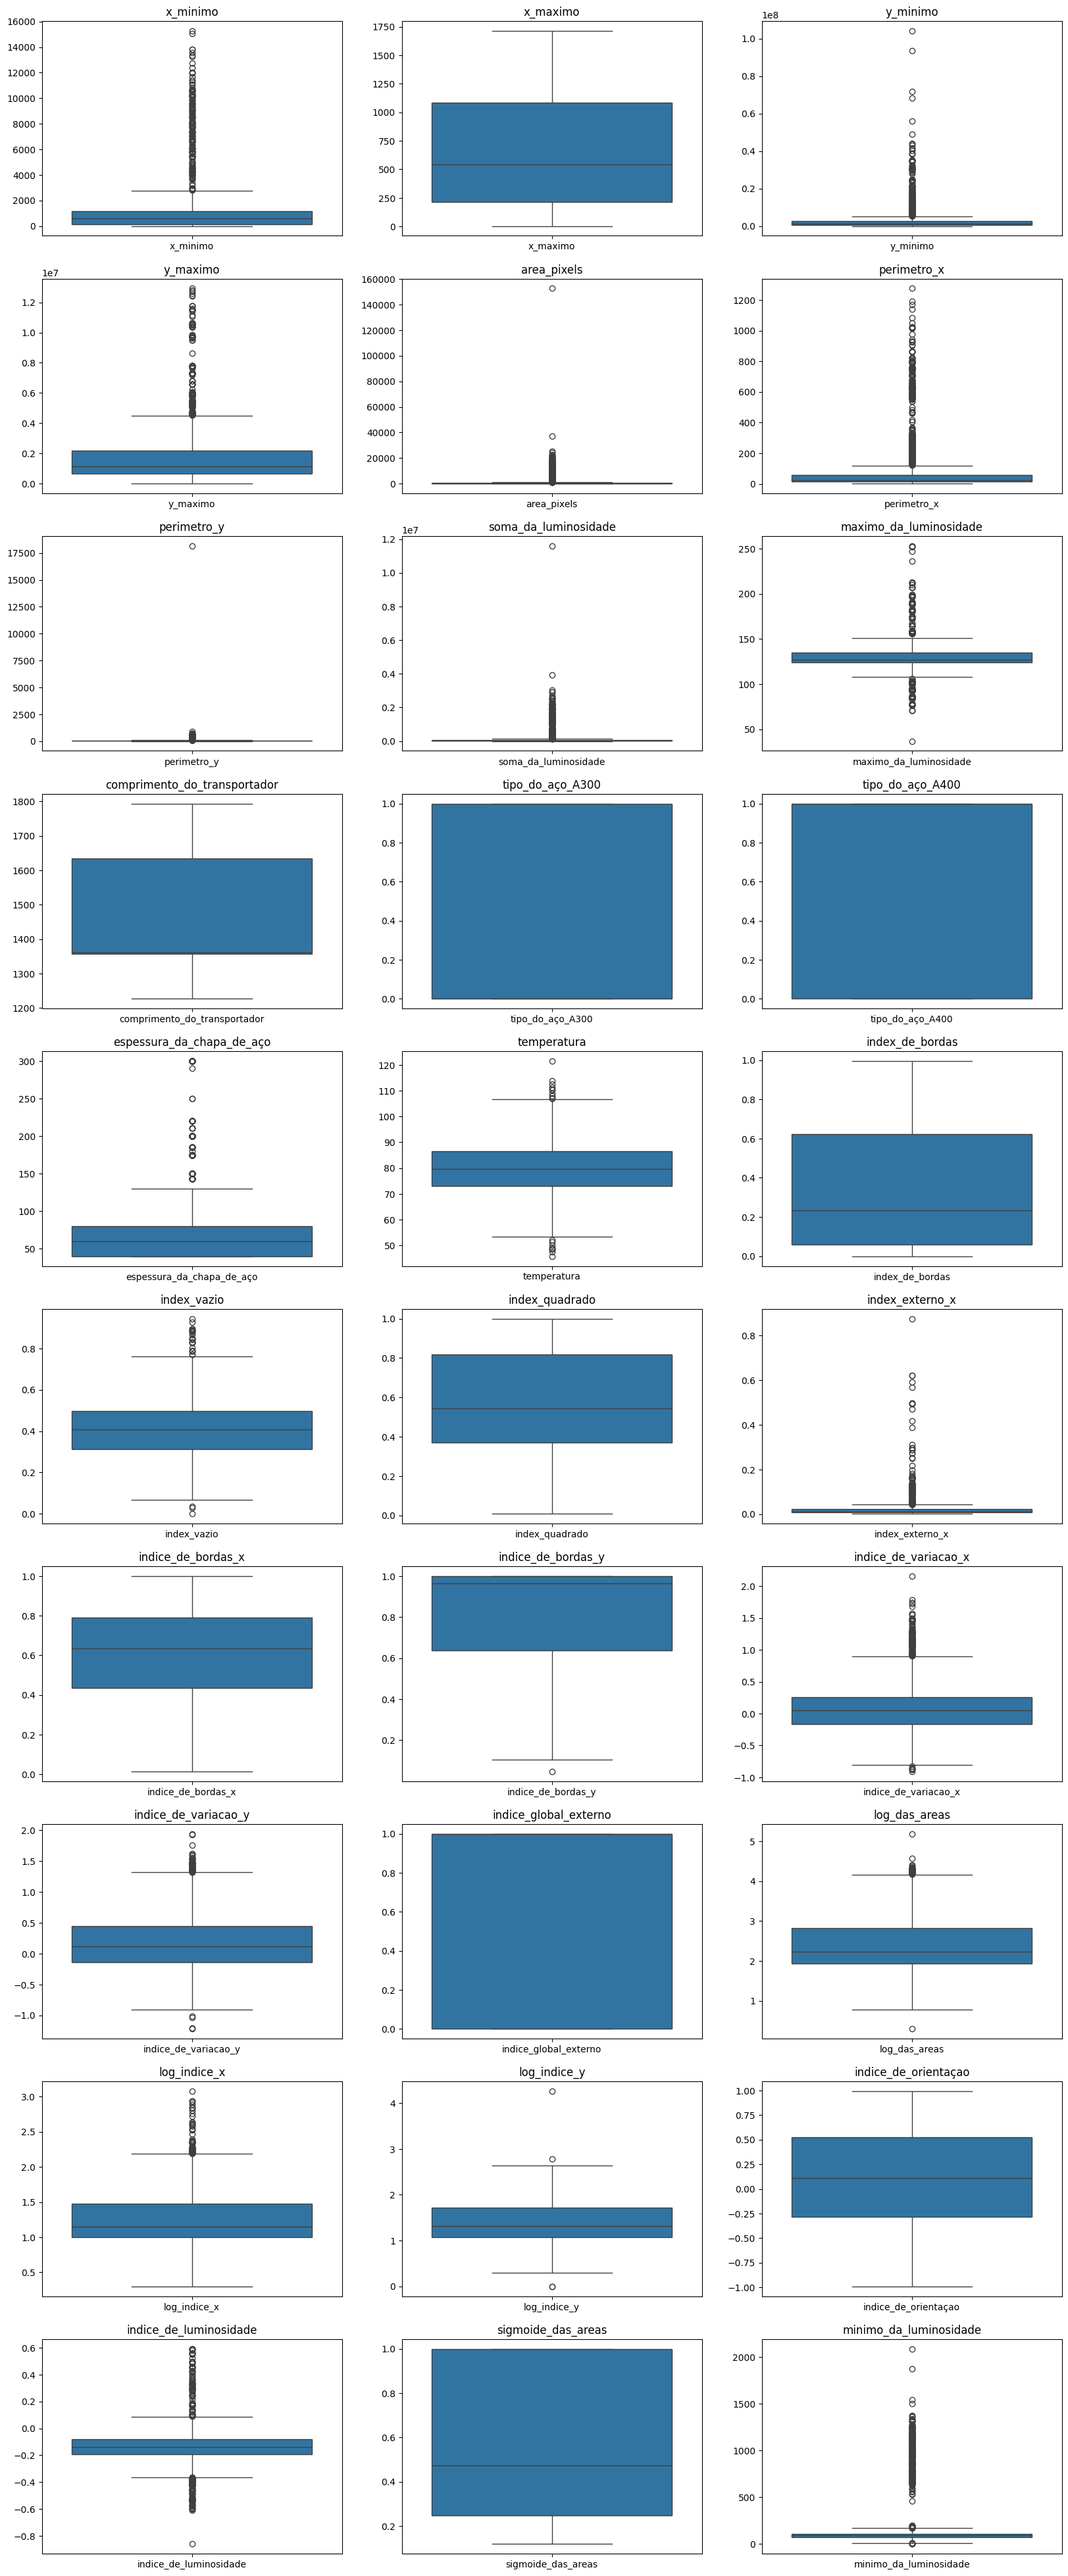

In [78]:
plot_all_boxplots(bootcamp_train_df)

# Tratamento de Dados - Outliers

In [79]:
def calculate_iqr(threshold_bias, column):
  q1 = bootcamp_train_df[column].quantile(0.25)
  q3 = bootcamp_train_df[column].quantile(0.75)
  iqr = q3 - q1

  q1_threshold = q1 - threshold_bias * iqr
  q3_threshold = q3 + threshold_bias * iqr
  return q1_threshold, q3_threshold

## Verificar se é viável remover os outliers

In [80]:
def get_index_from_rows_with_outliers(threshold_bias):
  index_map = {}
  for column in bootcamp_train_df.columns:
    q1_threshold, q3_threshold = calculate_iqr(threshold_bias, column)
    rows_to_drop = bootcamp_train_df[(bootcamp_train_df[column] < q1_threshold) | (bootcamp_train_df[column] > q3_threshold)].index
    index_map[column] = list(rows_to_drop)
    index_map[column].sort()
  return index_map

In [81]:
rows_with_outliers_to_change_map = get_index_from_rows_with_outliers(1.5)
rows_with_outliers_to_change_map.pop('targets')
for key in rows_with_outliers_to_change_map.keys():
  rows_to_remove_quantity = len(rows_with_outliers_to_change_map[key])
  print(f'{key}: {rows_to_remove_quantity}')

x_minimo: 187
x_maximo: 0
y_minimo: 362
y_maximo: 184
area_pixels: 641
perimetro_x: 631
perimetro_y: 546
soma_da_luminosidade: 680
maximo_da_luminosidade: 286
comprimento_do_transportador: 0
tipo_do_aço_A300: 0
tipo_do_aço_A400: 0
espessura_da_chapa_de_aço: 335
temperatura: 19
index_de_bordas: 0
index_vazio: 29
index_quadrado: 0
index_externo_x: 651
indice_de_bordas_x: 0
indice_de_bordas_y: 1
indice_de_variacao_x: 150
indice_de_variacao_y: 74
indice_global_externo: 0
log_das_areas: 60
log_indice_x: 397
log_indice_y: 4
indice_de_orientaçao: 0
indice_de_luminosidade: 220
sigmoide_das_areas: 0
minimo_da_luminosidade: 361


In [82]:
def plot_all_data(data):
  figure, axis = plt.subplots(10, 3)
  figure.set_size_inches(20, 50)
  x_index = 0
  y_index = 0
  for column in data.columns[:-1]:
    axis[y_index, x_index].plot(data[[column]])
    axis[y_index, x_index].set_title(column)

    x_index = x_index + 1
    if x_index == 3:
      x_index = 0
      y_index = y_index + 1

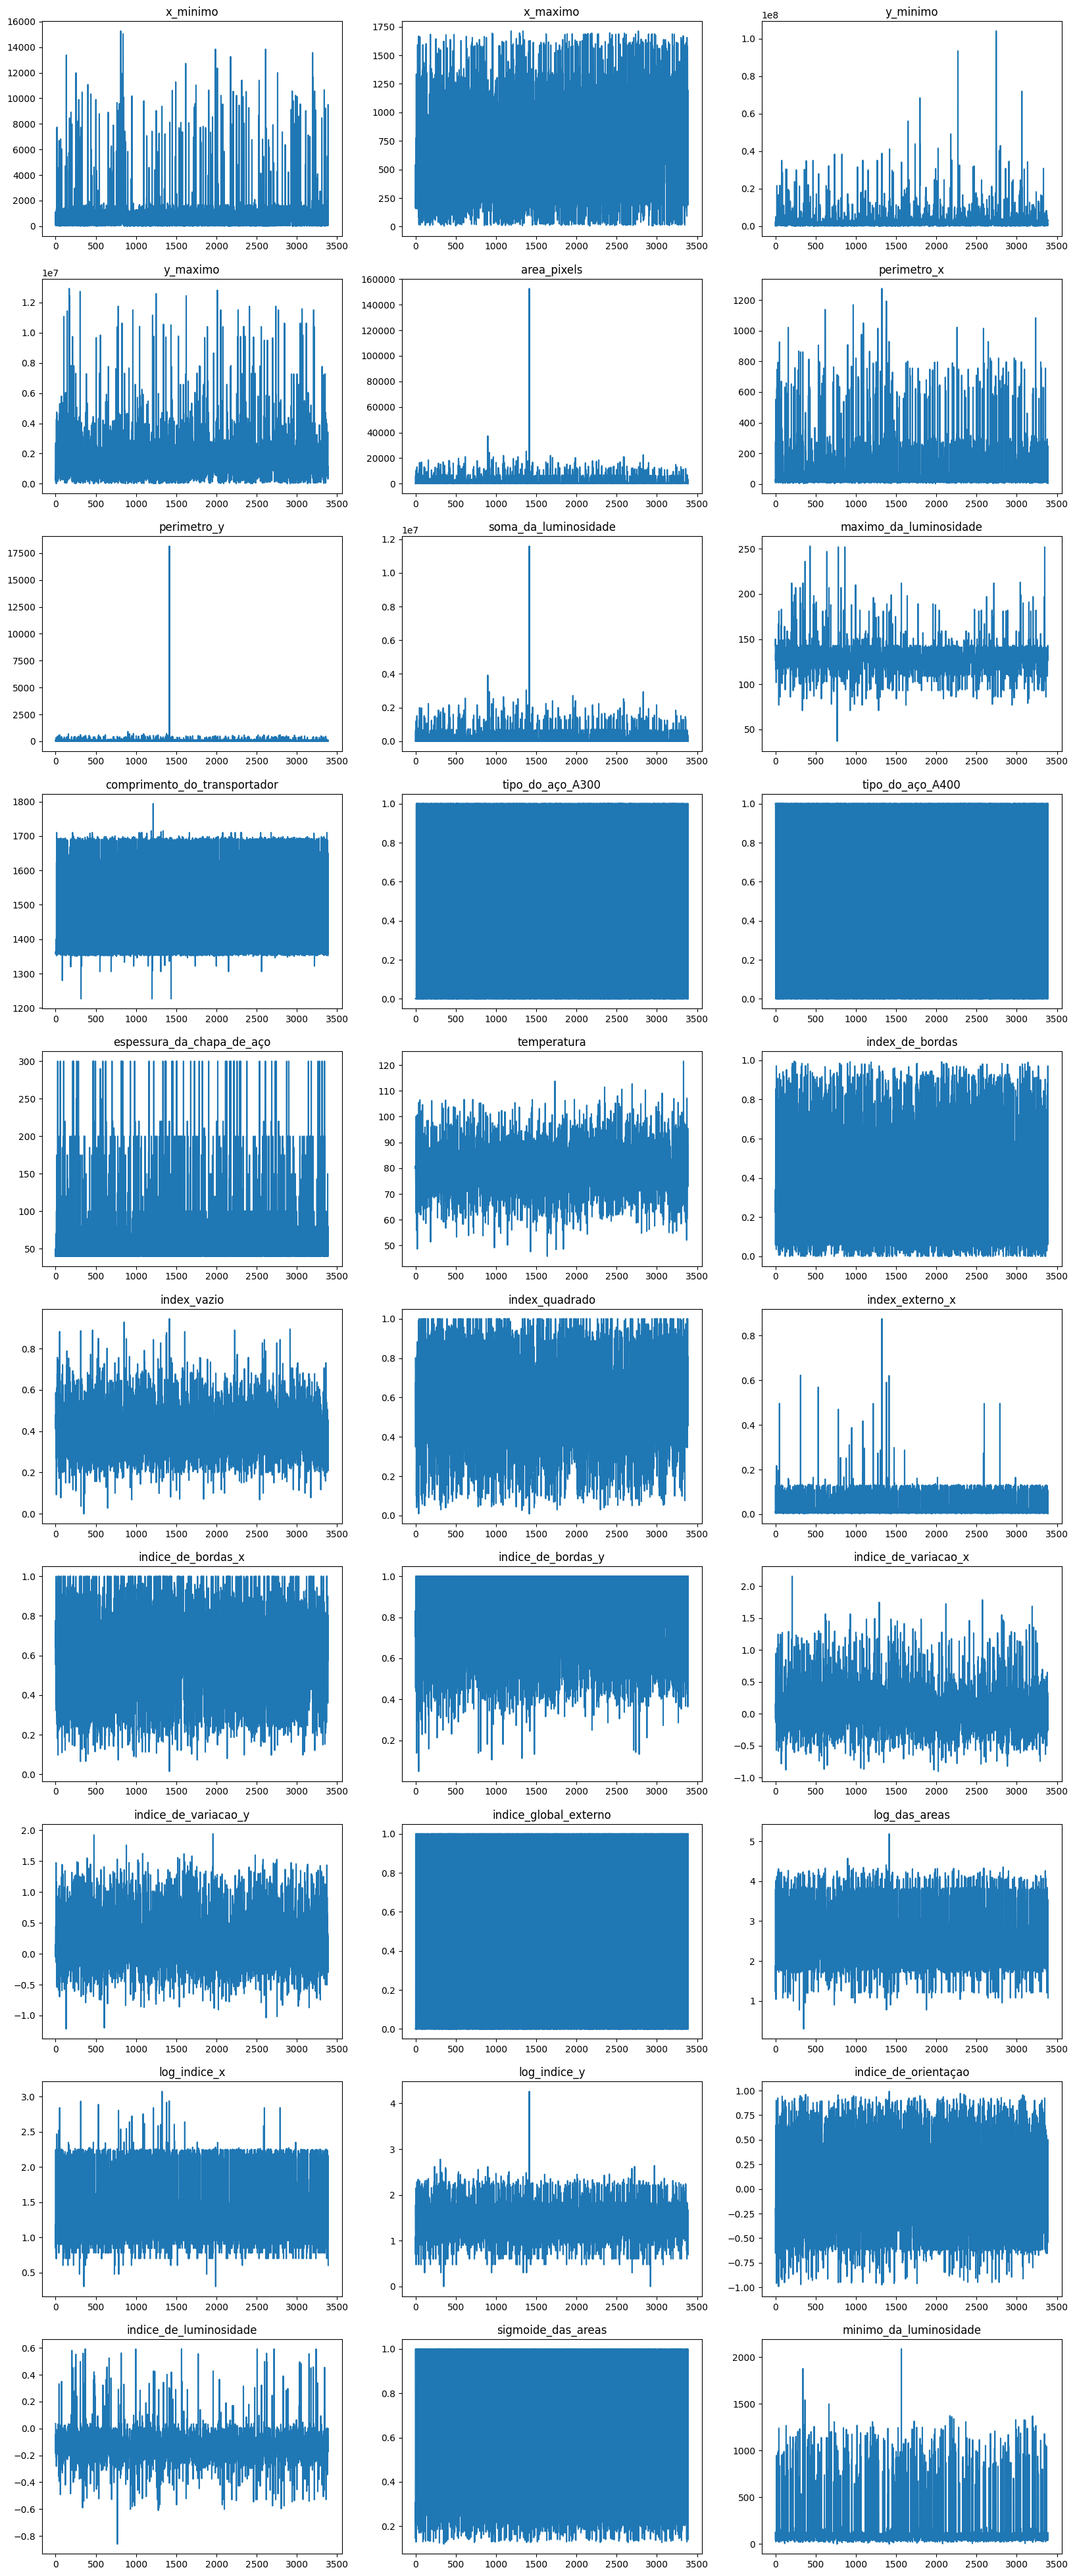

In [83]:
plot_all_data(bootcamp_train_df)

## Remover Outliers Mais Discrepantes

In [84]:
data_to_drop = bootcamp_train_df.sort_values(by='y_minimo', ascending=False).head(6).index
bootcamp_train_df.drop(data_to_drop, axis=0, inplace=True)

In [85]:
data_to_drop = bootcamp_train_df.sort_values(by='area_pixels', ascending=False).head(2).index
bootcamp_train_df.drop(data_to_drop, axis=0, inplace=True)

In [86]:
data_to_drop = bootcamp_train_df.sort_values(by='minimo_da_luminosidade', ascending=False).iloc[:2].index
bootcamp_train_df.drop(data_to_drop, axis=0, inplace=True)

In [87]:
data_to_drop = bootcamp_train_df.sort_values(by='indice_de_luminosidade', ascending=True).iloc[:1].index
bootcamp_train_df.drop(data_to_drop, axis=0, inplace=True)

In [88]:
data_to_drop = bootcamp_train_df.sort_values(by='temperatura', ascending=False).iloc[:1].index
bootcamp_train_df.drop(data_to_drop, axis=0, inplace=True)

In [89]:
data_to_drop = bootcamp_train_df.sort_values(by='indice_de_variacao_x', ascending=True).iloc[:2].index
bootcamp_train_df.drop(data_to_drop, axis=0, inplace=True)

In [90]:
data_to_drop = bootcamp_train_df.sort_values(by='index_externo_x', ascending=True).iloc[:10].index
bootcamp_train_df.drop(data_to_drop, axis=0, inplace=True)

In [91]:
data_to_drop = bootcamp_train_df.sort_values(by='maximo_da_luminosidade', ascending=True).iloc[:5].index
bootcamp_train_df.drop(data_to_drop, axis=0, inplace=True)

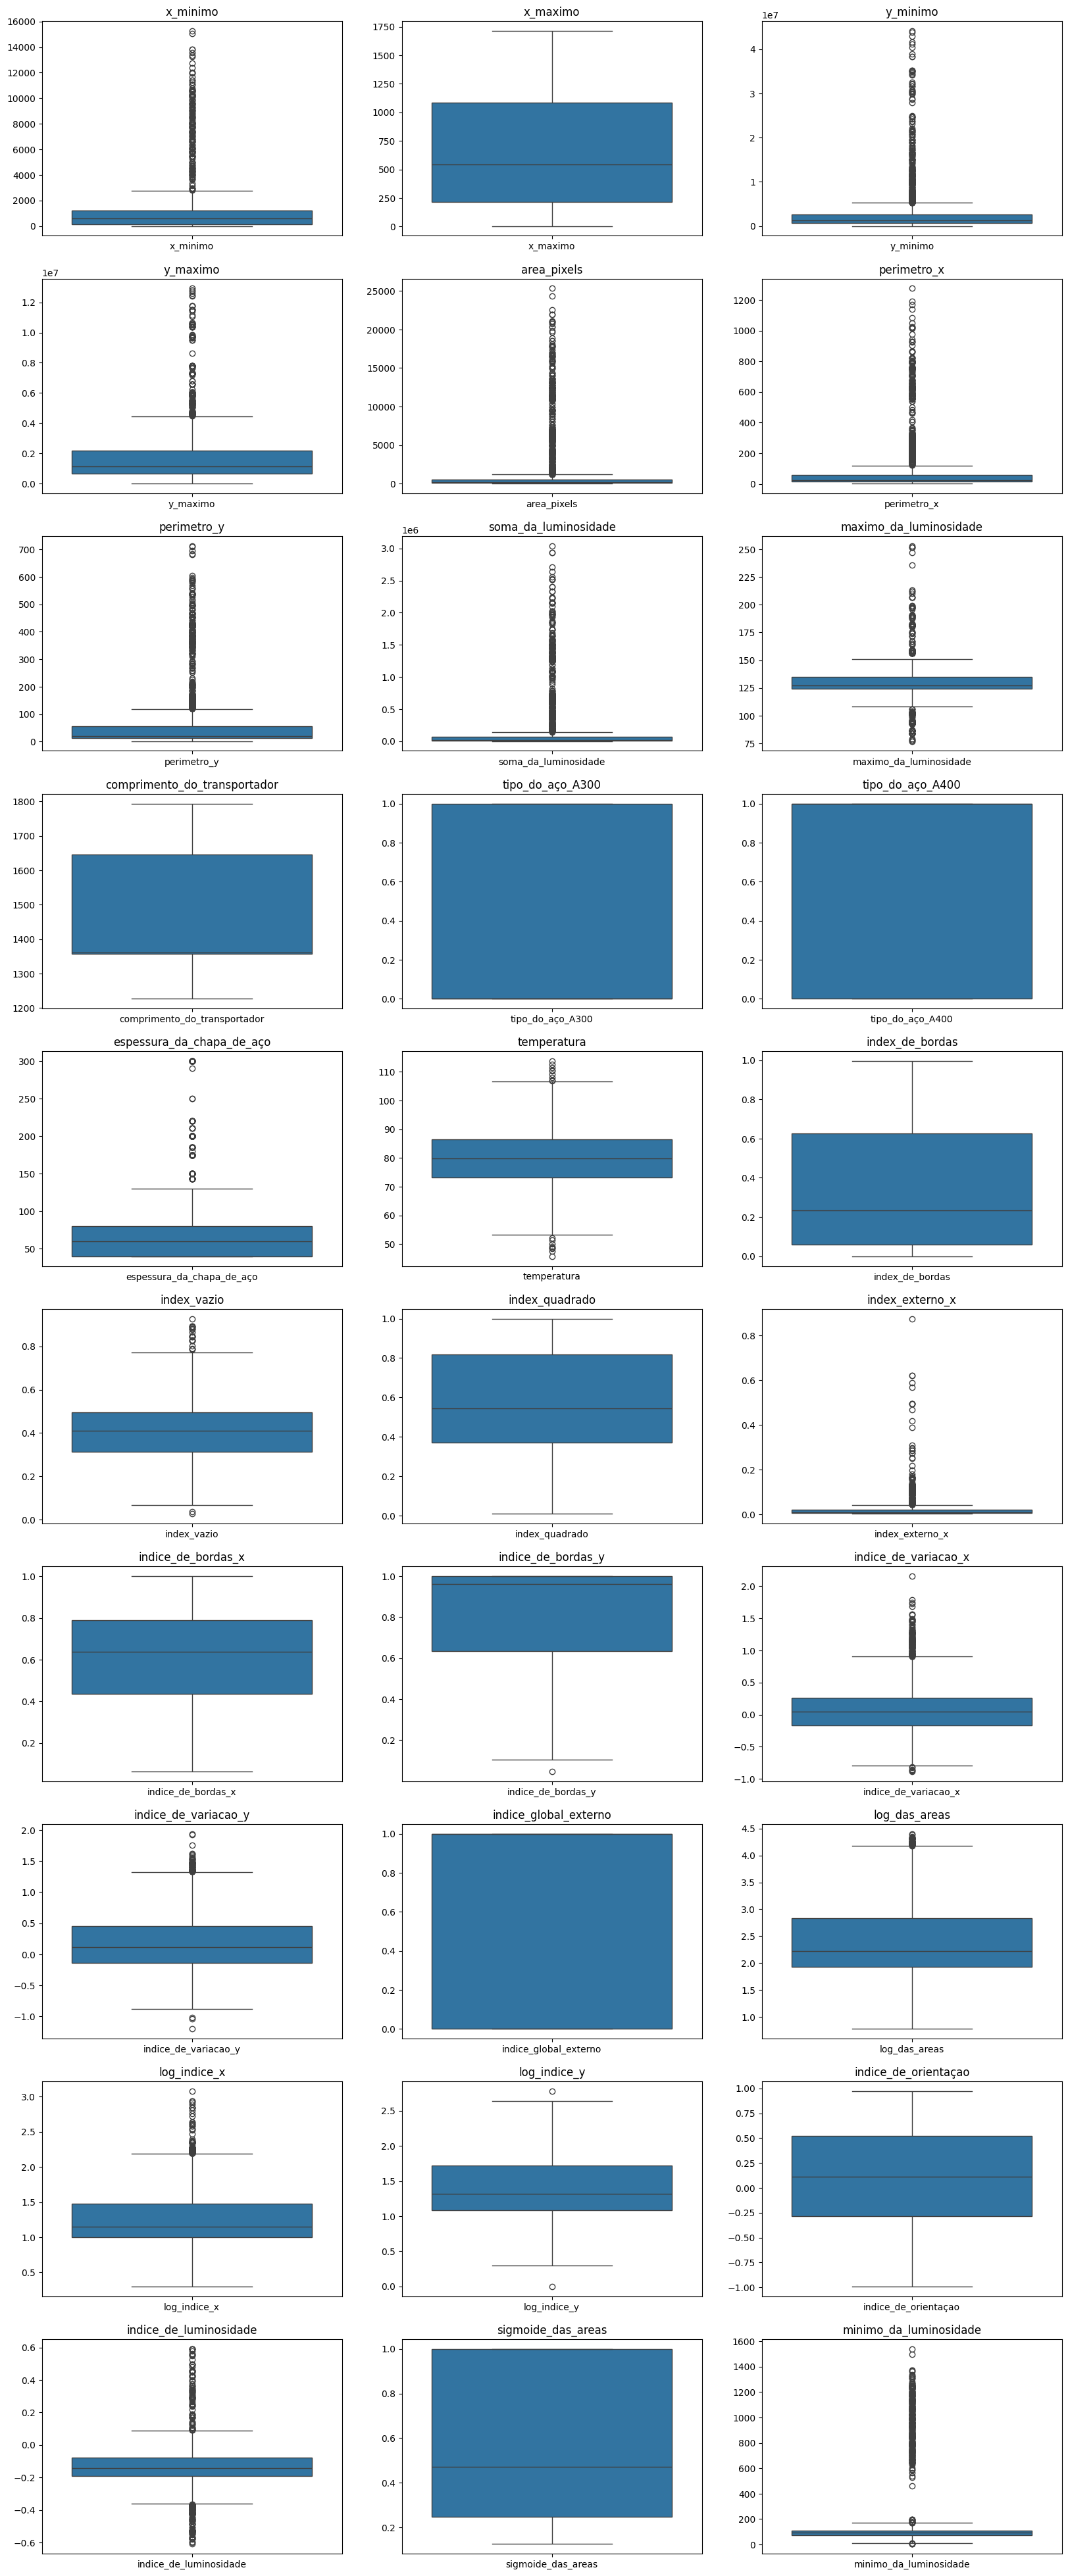

In [92]:
plot_all_boxplots(bootcamp_train_df)

# Tratamento de Dados - Normalização

In [93]:
numeric_data = bootcamp_train_df[['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo',
       'area_pixels', 'perimetro_x', 'perimetro_y', 'soma_da_luminosidade',
       'maximo_da_luminosidade', 'comprimento_do_transportador',
       'espessura_da_chapa_de_aço', 'temperatura', 'index_de_bordas',
       'index_vazio', 'index_quadrado', 'index_externo_x', 'indice_de_bordas_x',
       'indice_de_bordas_y', 'indice_de_variacao_x', 'indice_de_variacao_y',
       'indice_global_externo', 'log_das_areas', 'log_indice_x',
       'log_indice_y', 'indice_de_orientaçao', 'indice_de_luminosidade',
       'sigmoide_das_areas', 'minimo_da_luminosidade']]
categorical_data = bootcamp_train_df[['tipo_do_aço_A300', 'tipo_do_aço_A400', 'targets']]

In [94]:
scaler = MinMaxScaler()
scaler.set_output(transform="pandas")

MinMaxScaler()

In [95]:
normalized_data = scaler.fit_transform(numeric_data)

In [96]:
bootcamp_train_df = pd.concat([normalized_data, categorical_data], axis=1)
bootcamp_train_df.shape

(3349, 31)

<Axes: ylabel='x_maximo'>

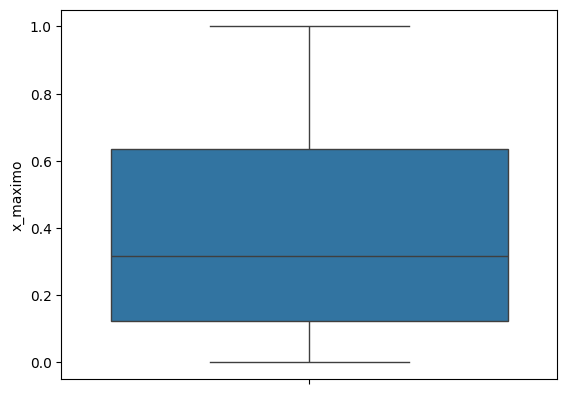

In [99]:
sns.boxplot(data=bootcamp_train_df['x_maximo'])

In [100]:
bootcamp_train_df.to_csv('normalized_data.csv', sep=',', index=False)